In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score 
from sklearn import metrics
from sklearn.metrics import f1_score,classification_report,precision_score,recall_score
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [197]:
df= pd.read_csv('Cleaned_Crashes')



In [219]:
df['AGE'].value_counts()

25.0     53409
26.0      6162
24.0      6095
23.0      6030
27.0      6024
         ...  
98.0         1
103.0        1
108.0        1
101.0        1
104.0        1
Name: AGE, Length: 105, dtype: int64

In [198]:
df.columns

Index(['Unnamed: 0', 'CRASH_RECORD_ID', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'MAKE', 'MODEL', 'VEHICLE_YEAR',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'MANEUVER', 'OCCUPANT_CNT',
       'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'SEX', 'AGE', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'Crash_year'],
      dtype='object')

#### Dummy Model

In [155]:
X = df.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [156]:
dummy = DummyClassifier()
dummy.fit(X_train,y_train)

DummyClassifier()

In [157]:
dummy.predict(X_train)

array(['FAILING TO YIELD RIGHT-OF-WAY', 'FAILING TO YIELD RIGHT-OF-WAY',
       'FAILING TO YIELD RIGHT-OF-WAY', ...,
       'FAILING TO YIELD RIGHT-OF-WAY', 'FAILING TO YIELD RIGHT-OF-WAY',
       'FAILING TO YIELD RIGHT-OF-WAY'], dtype='<U29')

In [158]:
dummy.score(X_train, y_train)

0.18442319909186533

### Need to trim the categories within our target dataset

In [199]:
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace(r'[^\w\s]+', '')
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT':'BICYCLE ADVANCING LEGALLY ON RED LIGHT'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'BICYCLE ADVANCING LEGALLY ON RED LIGHT':'TURNING RIGHT ON RED'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'PASSING STOPPED SCHOOL BUS':'RELATED TO BUS STOP'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'RELATED TO BUS STOP':'SCHOOL BUS RELATED'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'TEXTING':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'CELL PHONE USE OTHER THAN TEXTING':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING YIELD SIGN':'DISREGARDING ROAD MARKINGS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING ROAD MARKINGS':'DISREGARDING OTHER TRAFFIC SIGNS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ANIMAL':'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'EXCEEDING SAFE SPEED FOR CONDITIONS':'EXCEEDING AUTHORIZED SPEED LIMIT'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'EXCEEDING AUTHORIZED SPEED LIMIT':'SPEEDING'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISTRACTION - FROM OUTSIDE VEHICLE':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)':'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISTRACTION - FROM INSIDE VEHICLE':'DISTRACTION'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING OTHER TRAFFIC SIGNS':'DISREGARDING TRAFFIC SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING TRAFFIC SIGNALS':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DISREGARDING STOP SIGN':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)':'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 'OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER THE INFLUENCE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'DRIVING ON WRONG SIDE/WRONG WAY':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ROAD CONSTRUCTION/MAINTENANCE':'ROAD ENGINEERING/SURFACE/MARKING DEFECTS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ROAD ENGINEERING/SURFACE/MARKING DEFECTS':'ROAD CONSTRUCTION/MAINTENANCE/DEFECTS' })
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'IMPROPER OVERTAKING/PASSING':'IMPROPER LANE USAGE' })
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'PHYSICAL CONDITION OF DRIVER':'OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER THE INFLUENCE' })
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'FOLLOWING TOO CLOSELY':'FAILING TO REDUCE SPEED TO AVOID CRASH'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'FAILING TO REDUCE SPEED TO AVOID CRASH':'FAILING TO REDUCE SPEED TO AVOID CRASH/TOO CLOSE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'IMPROPER TURNING/NO SIGNAL':'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'IMPROPER BACKING':'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'TURNING RIGHT ON RED':'FAILING TO YIELD RIGHT-OF-WAY'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'SPEEDING':'DISREGARDING TRAFFIC SIGNS/SIGNALS'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)':'PHYSICAL ROAD HINDERANCES'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'ROAD CONSTRUCTION/MAINTENANCE/DEFECTS':'PHYSICAL ROAD HINDERANCES'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST':'PHYSICAL ROAD HINDERANCES'})
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'OBSTRUCTED CROSSWALKS':'PHYSICAL ROAD HINDERANCES'})
df= df[(df['PRIM_CONTRIBUTORY_CAUSE'] != "NOT APPLICABLE")]
df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].replace({'OBSTRUCTED CROSSWALKS':'PHYSICAL ROAD HINDERANCES'})


In [160]:
df['PRIM_CONTRIBUTORY_CAUSE'].value_counts()

FAILING TO REDUCE SPEED TO AVOID CRASH/TOO CLOSE             63098
FAILING TO YIELD RIGHT-OF-WAY                                47546
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                          44775
IMPROPER LANE USAGE                                          33271
DISREGARDING TRAFFIC SIGNS/SIGNALS                           17484
OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER THE INFLUENCE    10287
WEATHER                                                       7254
DISTRACTION                                                   6651
PHYSICAL ROAD HINDERANCES                                     6024
EQUIPMENT - VEHICLE CONDITION                                 2926
SCHOOL BUS RELATED                                             179
Name: PRIM_CONTRIBUTORY_CAUSE, dtype: int64

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239495 entries, 0 to 256054
Data columns (total 46 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     239495 non-null  int64  
 1   CRASH_RECORD_ID                239495 non-null  object 
 2   CRASH_DATE_x                   239495 non-null  object 
 3   POSTED_SPEED_LIMIT             239495 non-null  int64  
 4   TRAFFIC_CONTROL_DEVICE         239495 non-null  object 
 5   DEVICE_CONDITION               239495 non-null  object 
 6   WEATHER_CONDITION              239495 non-null  object 
 7   LIGHTING_CONDITION             239495 non-null  object 
 8   FIRST_CRASH_TYPE               239495 non-null  object 
 9   TRAFFICWAY_TYPE                239495 non-null  object 
 10  ALIGNMENT                      239495 non-null  object 
 11  ROADWAY_SURFACE_COND           239495 non-null  object 
 12  ROAD_DEFECT                   

### Dummy Model with new Consolidated Categories

In [162]:
X = df.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [163]:
dummy = DummyClassifier()
dummy.fit(X_train,y_train)

DummyClassifier()

In [165]:
dummy.score(X_train, y_train)

0.26346028582404063

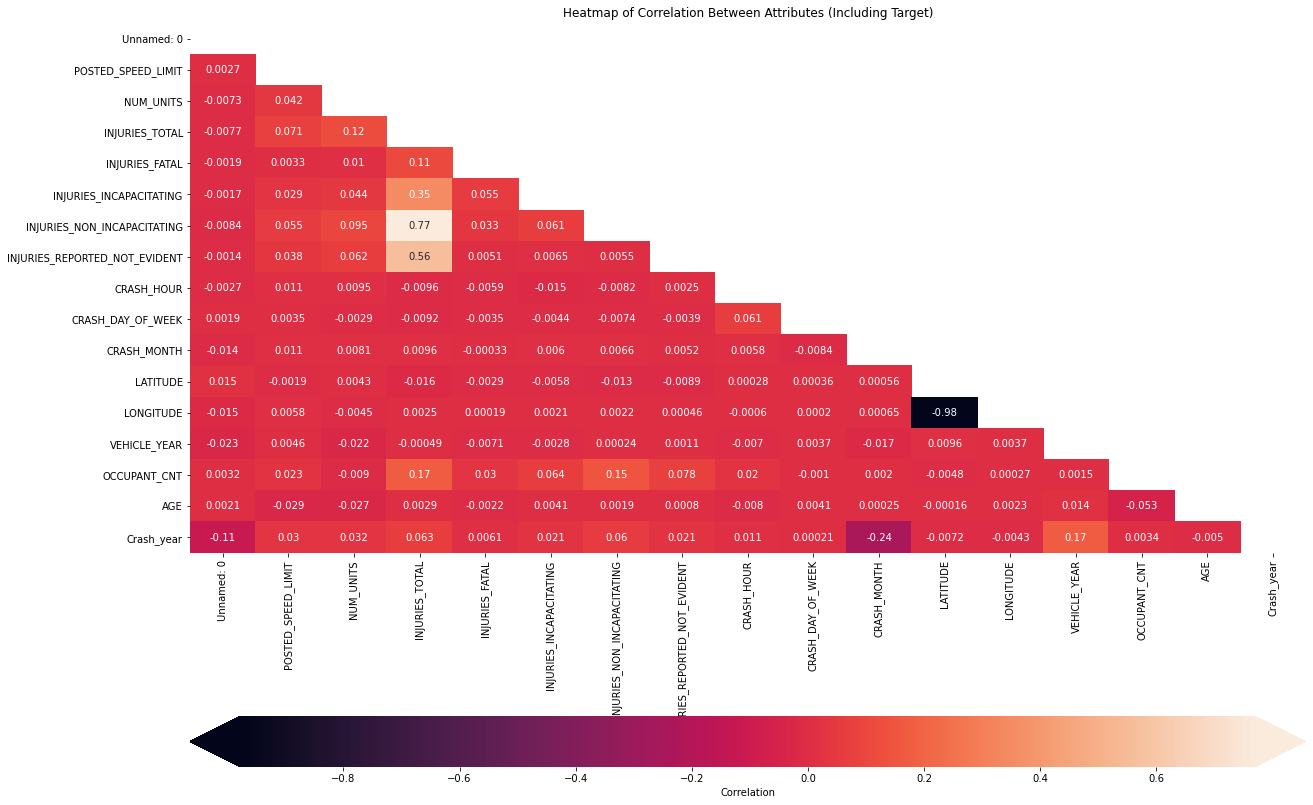

In [115]:
heatmap_data = df
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 15))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    data=corr,
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [116]:
df.columns


Index(['Unnamed: 0', 'CRASH_RECORD_ID', 'CRASH_DATE_x', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE',
       'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE',
       'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'LATITUDE', 'LONGITUDE', 'MAKE', 'MODEL', 'VEHICLE_YEAR',
       'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'MANEUVER', 'OCCUPANT_CNT',
       'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'SEX', 'AGE', 'AIRBAG_DEPLOYED',
       'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'Crash_year'],
      dtype='object')

In [200]:
df = df.drop(['Unnamed: 0','CRASH_RECORD_ID', 'CRASH_DATE_x', 'LATITUDE', 'LONGITUDE'], axis=1)
df

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,...,FIRST_CONTACT_POINT,PERSON_TYPE,SEX,AGE,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_VISION,PHYSICAL_CONDITION,Crash_year
0,35,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,REAR,DRIVER,M,31.0,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,UNKNOWN,NORMAL,2019
1,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,REAR-RIGHT,DRIVER,F,20.0,DEPLOYMENT UNKNOWN,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,2017
2,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,TOTAL (ALL AREAS),DRIVER,M,50.0,NOT APPLICABLE,NONE,NO INDICATION OF INJURY,UNKNOWN,NORMAL,2020
3,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE OPPOSITE DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,SIDE-RIGHT,DRIVER,M,26.0,NOT APPLICABLE,NONE,NONINCAPACITATING INJURY,NOT OBSCURED,NORMAL,2020
4,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,UNKNOWN,...,REAR-RIGHT,DRIVER,M,44.0,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256050,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,OTHER,DRIVER,F,24.0,"DEPLOYED, FRONT",NONE,NONINCAPACITATING INJURY,NOT OBSCURED,NORMAL,2021
256051,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,REAR-LEFT,DRIVER,M,25.0,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,MOVING VEHICLES,NORMAL,2021
256052,10,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,ANGLE,PARKING LOT,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,...,REAR-LEFT,DRIVER,F,65.0,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,UNKNOWN,UNKNOWN,2021
256053,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,ANGLE,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,...,SIDE-RIGHT,DRIVER,M,31.0,DID NOT DEPLOY,NONE,NO INDICATION OF INJURY,NOT OBSCURED,NORMAL,2021


In [118]:
X = df.drop('PRIM_CONTRIBUTORY_CAUSE',axis=1)
y = df['PRIM_CONTRIBUTORY_CAUSE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

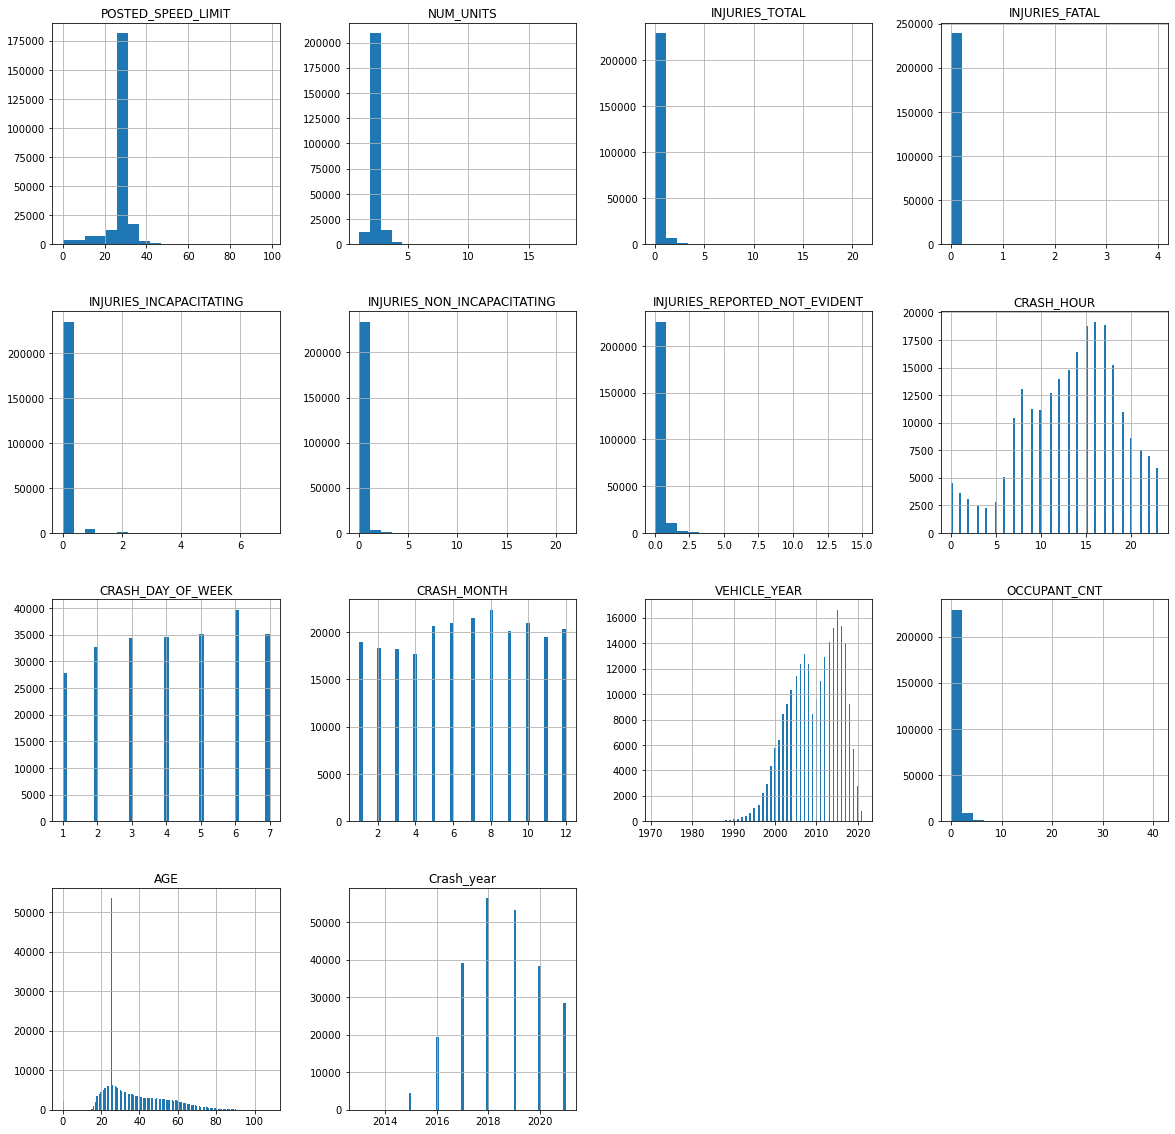

In [119]:
df.hist(figsize=(20,20), bins='auto');

#### The dataset is heavily imbalanced so Ill use the SMOTE technique to help balance the dataset



In [120]:
df['FIRST_CRASH_TYPE'].value_counts()

REAR END                        67588
TURNING                         43218
SIDESWIPE SAME DIRECTION        38350
ANGLE                           31989
PARKED MOTOR VEHICLE            30802
FIXED OBJECT                    10163
PEDESTRIAN                       3853
SIDESWIPE OPPOSITE DIRECTION     3233
HEAD ON                          2405
PEDALCYCLIST                     2000
REAR TO FRONT                    1870
OTHER OBJECT                     1636
REAR TO SIDE                     1142
OTHER NONCOLLISION                596
REAR TO REAR                      321
ANIMAL                            191
OVERTURNED                        125
TRAIN                              13
Name: FIRST_CRASH_TYPE, dtype: int64

In [132]:
df.columns

Index(['POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'NUM_UNITS', 'MOST_SEVERE_INJURY',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'MAKE', 'MODEL',
       'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'MANEUVER',
       'OCCUPANT_CNT', 'FIRST_CONTACT_POINT', 'PERSON_TYPE', 'SEX', 'AGE',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'Crash_year'],
      dtype='object')

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239495 entries, 0 to 256054
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   POSTED_SPEED_LIMIT             239495 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE         239495 non-null  object 
 2   DEVICE_CONDITION               239495 non-null  object 
 3   WEATHER_CONDITION              239495 non-null  object 
 4   LIGHTING_CONDITION             239495 non-null  object 
 5   FIRST_CRASH_TYPE               239495 non-null  object 
 6   TRAFFICWAY_TYPE                239495 non-null  object 
 7   ALIGNMENT                      239495 non-null  object 
 8   ROADWAY_SURFACE_COND           239495 non-null  object 
 9   ROAD_DEFECT                    239495 non-null  object 
 10  CRASH_TYPE                     239495 non-null  object 
 11  DAMAGE                         239495 non-null  object 
 12  PRIM_CONTRIBUTORY_CAUSE       

In [194]:
# df['AGE'] = df['AGE'].astype(float)
# #df['DRIVER_VISION'] = df['DRIVER_VISION'].astype(str)
# #df['DRIVER_ACTION'] = df['DRIVER_ACTION'].astype(str)
# df['PHYSICAL_CONDITION'] = df['PHYSICAL_CONDITION'].astype(str)
# df['FIRST_CRASH_TYPE'] = df['FIRST_CRASH_TYPE'].astype(str)
# df['ROADWAY_SURFACE_COND'] = df['ROADWAY_SURFACE_COND'].astype(str)
# df['DEVICE CONDITION'] = df['DEVICE_CONDITION'].astype(str)
# df['PRIM_CONTRIBUTORY_CAUSE'] = df['PRIM_CONTRIBUTORY_CAUSE'].astype(str)

# #tried crash year for columns but brought down my accuracy
# columns =['PRIM_CONTRIBUTORY_CAUSE', 'POSTED_SPEED_LIMIT',
#        'ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION','ROADWAY_SURFACE_COND']


# df_new = df[columns]
# new_df = df_new

# # getting dummies
# dummy_df=pd.get_dummies(new_df, columns= ['ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION','ROADWAY_SURFACE_COND'], drop_first=True)
# df= pd.concat([new_df, dummy_df], axis=1)
# df = df.drop(['ROADWAY_SURFACE_COND'],axis =1)

In [224]:
df['ROADWAY_SURFACE_COND'] = df['ROADWAY_SURFACE_COND'].astype(str)
df['TRAFFIC_CONTROL_DEVICE'] = df['TRAFFIC_CONTROL_DEVICE'].str.replace('/',' ')
df['TRAFFIC_CONTROL_DEVICE'] = df['TRAFFIC_CONTROL_DEVICE'].astype(str)

columns =['PRIM_CONTRIBUTORY_CAUSE', 'POSTED_SPEED_LIMIT','TRAFFIC_CONTROL_DEVICE',
       'ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION',]


df_new = df[columns]
new_df = df_new

# getting dummies
dummy_df=pd.get_dummies(new_df, columns= ['TRAFFIC_CONTROL_DEVICE','ROADWAY_SURFACE_COND','DEVICE_CONDITION', 'FIRST_CRASH_TYPE','DRIVER_VISION','PHYSICAL_CONDITION'], drop_first=True)

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239495 entries, 0 to 256054
Data columns (total 41 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   POSTED_SPEED_LIMIT             239495 non-null  int64  
 1   TRAFFIC_CONTROL_DEVICE         239495 non-null  object 
 2   DEVICE_CONDITION               239495 non-null  object 
 3   WEATHER_CONDITION              239495 non-null  object 
 4   LIGHTING_CONDITION             239495 non-null  object 
 5   FIRST_CRASH_TYPE               239495 non-null  object 
 6   TRAFFICWAY_TYPE                239495 non-null  object 
 7   ALIGNMENT                      239495 non-null  object 
 8   ROADWAY_SURFACE_COND           239495 non-null  object 
 9   ROAD_DEFECT                    239495 non-null  object 
 10  CRASH_TYPE                     239495 non-null  object 
 11  DAMAGE                         239495 non-null  object 
 12  PRIM_CONTRIBUTORY_CAUSE       

#### SMOTE

In [225]:
from imblearn.over_sampling import SMOTE
X = df.drop(['PRIM_CONTRIBUTORY_CAUSE'], axis =1)
y = df[['PRIM_CONTRIBUTORY_CAUSE']] 

# performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

# standardizing the data
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# handling the imbalance with SMOTE

smote = SMOTE(k_neighbors=6)
X_train, y_train = smote.fit_resample(X_train, y_train)

ValueError: could not convert string to float: 'STOP SIGN FLASHER'

In [ ]:
"""from imblearn.over_sampling import SMOTE
X = df.drop(['PRIM_CONTRIBUTORY_CAUSE'], axis =1)
y = df[['PRIM_CONTRIBUTORY_CAUSE']] 

# performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

# standardizing the data
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# handling the imbalance with SMOTE

smote = SMOTE(k_neighbors=6)
X_train, y_train = smote.fit_resample(X_train, y_train)"""

In [184]:
df

,PRIM_CONTRIBUTORY_CAUSE,POSTED_SPEED_LIMIT,DEVICE_CONDITION,FIRST_CRASH_TYPE,DRIVER_VISION,PHYSICAL_CONDITION,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,...,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET,ROADWAY_SURFACE_COND_ICE,ROADWAY_SURFACE_COND_OTHER,"ROADWAY_SURFACE_COND_SAND, MUD, DIRT",ROADWAY_SURFACE_COND_SNOW OR SLUSH,ROADWAY_SURFACE_COND_UNKNOWN,ROADWAY_SURFACE_COND_WET
0,DRIVING SKILLS/KNOWLEDGE/EXPERIENCE,35,NO CONTROLS,TURNING,UNKNOWN,NORMAL,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FAILING TO YIELD RIGHT-OF-WAY,35,FUNCTIONING PROPERLY,TURNING,UNKNOWN,UNKNOWN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FAILING TO YIELD RIGHT-OF-WAY,30,FUNCTIONING PROPERLY,REAR END,UNKNOWN,NORMAL,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER TH...,30,NO CONTROLS,SIDESWIPE OPPOSITE DIRECTION,NOT OBSCURED,NORMAL,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,IMPROPER LANE USAGE,30,FUNCTIONING PROPERLY,TURNING,UNKNOWN,UNKNOWN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256050,FAILING TO REDUCE SPEED TO AVOID CRASH/TOO CLOSE,35,FUNCTIONING PROPERLY,REAR END,NOT OBSCURED,NORMAL,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256051,IMPROPER LANE USAGE,30,FUNCTIONING PROPERLY,PARKED MOTOR VEHICLE,MOVING VEHICLES,NORMAL,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256052,OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER TH...,10,NO CONTROLS,ANGLE,UNKNOWN,UNKNOWN,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
256053,FAILING TO YIELD RIGHT-OF-WAY,30,FUNCTIONING PROPERLY,ANGLE,NOT OBSCURED,NORMAL,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
y_train = y_train.values.ravel()

#### Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial', max_iter=200)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


acc_logreg = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_logreg))

Accuracy: 0.45323512710024383 


/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random Forest

In [39]:
## RF with SMOTE ##
from sklearn.ensemble import RandomForestClassifier
rand=RandomForestClassifier(max_depth=7, n_estimators=250, random_state=42)

rand.fit(X_train, y_train)
y_pred = rand.predict(X_test)


acc_rand = accuracy_score(y_pred, y_test)
print('Accuracy: {} '.format(acc_rand))



Accuracy: 0.45423723151952433 


#### DecisionTree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

                                                           precision    recall  f1-score   support

                       DISREGARDING TRAFFIC SIGNS/SIGNALS       0.35      0.46      0.40      4298
                                              DISTRACTION       0.07      0.10      0.08      1627
                      DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       0.41      0.29      0.34     11162
                            EQUIPMENT - VEHICLE CONDITION       0.05      0.09      0.06       767
         FAILING TO REDUCE SPEED TO AVOID CRASH/TOO CLOSE       0.74      0.67      0.70     15783
                            FAILING TO YIELD RIGHT-OF-WAY       0.45      0.43      0.44     11869
                                      IMPROPER LANE USAGE       0.52      0.55      0.53      8486
OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER THE INFLUENCE       0.14      0.21      0.17      2473
                                PHYSICAL ROAD HINDERANCES       0.24      0.18      0.21      1498
         

#### Random Forest Classifier

In [41]:
rfc = RandomForestClassifier(max_depth=7, n_estimators=600, random_state=42)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(classification_report(y_test,predictions))

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                                           precision    recall  f1-score   support

                       DISREGARDING TRAFFIC SIGNS/SIGNALS       0.28      0.59      0.38      4298
                                              DISTRACTION       0.00      0.00      0.00      1627
                      DRIVING SKILLS/KNOWLEDGE/EXPERIENCE       0.62      0.14      0.22     11162
                            EQUIPMENT - VEHICLE CONDITION       0.05      0.17      0.08       767
         FAILING TO REDUCE SPEED TO AVOID CRASH/TOO CLOSE       0.75      0.76      0.76     15783
                            FAILING TO YIELD RIGHT-OF-WAY       0.40      0.27      0.32     11869
                                      IMPROPER LANE USAGE       0.54      0.59      0.56      8486
OPERATING VEHICLE IN NEGLIGENT MANNER/UNDER THE INFLUENCE       0.15      0.20      0.17      2473
                                PHYSICAL ROAD HINDERANCES       0.11      0.40      0.17      1498
         

/Users/avijames/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Support Vector Machines

In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)

In [ ]:
predictions = svc_model.predict(X_test)

In [ ]:
print(classification_report(y_test,predictions))

### Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(classification_report(y_test,grid_predictions))

### One Hot Encoder

In [ ]:
cat_cols = list(df.select_dtypes(['object']).columns.values)
cat_cols

In [ ]:
# We chose certain feature as categorical.

categoricals = ['CRASH_HOUR','POSTED_SPEED_LIMIT', 'VEHICLE_YEAR', 'Crash_year', 'CRASH_MONTH','CRASH_HOUR', 'CRASH_DAY_OF_WEEK']


train_dummies = X_train[categoricals]
test_dummies = X_test[categoricals]

# Create OneHotEncoder object to create dummies
ohe = OneHotEncoder(handle_unknown='ignore')

# Transform the dataset into dummies matrix
enc = ohe.fit(train_dummies)

train_dummies_trans = enc.transform(train_dummies)
test_dummies_trans = enc.transform(test_dummies)

# Dummies values in matrix form
train_data = train_dummies_trans.todense()
test_data = test_dummies_trans.todense()

# New dummy column names
names = ohe.get_feature_names(categoricals)

# Make them into Dataframe
train_dummies_trans_df = pd.DataFrame(train_data, columns=names)
test_dummies_trans_df = pd.DataFrame(test_data, columns=names)


### Standard Scaler

In [ ]:
# Continuous features
continuous = ['AGE', 'NUM_UNITS','INJURIES_TOTAL', 'INJURIES_FATAL','INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',]

train_continuous = X_train[continuous]
test_continuous = X_test[continuous]

# Make StandardScaler object
scaler = StandardScaler()

# Fit the train data into the scaler
df_fit = scaler.fit(train_continuous)

# Transform data
train_data_scaled = df_fit.transform(train_continuous)
test_data_scaled = df_fit.transform(test_continuous)

# Make them into Dataframe
train_scaled_df = pd.DataFrame(train_data_scaled, columns = continuous)
test_scaled_df = pd.DataFrame(test_data_scaled, columns = continuous)

### Combining the data

In [ ]:
# Reset index to make sure dummy features and scaled features concat correctly
train_dummies_trans_df.reset_index(drop=True, inplace=True)
train_scaled_df.reset_index(drop=True, inplace=True)

test_dummies_trans_df.reset_index(drop=True, inplace=True)
test_scaled_df.reset_index(drop=True, inplace=True)

# Combine the two dataframe together
X_train_comb = pd.concat([train_scaled_df, train_dummies_trans_df], axis=1)
X_test_comb = pd.concat([test_scaled_df, test_dummies_trans_df], axis=1)

#### Logistic Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate,ShuffleSplit
from sklearn.linear_model import LogisticRegression

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


print("Train score:     ", first_model_scores["train_score"].mean())
print("Validation score:", first_model_scores["test_score"].mean())